# Step 2 Skills & Degree Analysis for Different Majors

In this part, we analyzed the __skill set__ and __degree__ requirement for different majors.
<p> To get the __skill set__ required for different majors, we did natural language processing on the posts of the jobs, and extract the top skills that are related to different majors. Further analysis was also done by comparing those skill sets.
<p> The __degree requirement__ are compared across different majors and different job types (internship and fulltime)

## Part 1 Qualifications & Skills

In [205]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from collections import Counter

import string
import nltk
#from nltk import corpus
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer   # sklearn --- primer machine learning package
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
# plt.style.use('ggplot')
#%matplotlib inline
from matplotlib_venn import venn3
from wordcloud import WordCloud

__Read data from the csv file got from website__

In [53]:
summary_stat = pd.read_csv('Jobdescription/summary_stat.csv')
summary_che = pd.read_csv('Jobdescription/summary_che.csv')
summary_mse = pd.read_csv('Jobdescription/summary_mse.csv')

__Check how many missing values__

In [3]:
print (summary_stat.isnull().sum())
print (summary_che.isnull().sum())
print (summary_mse.isnull().sum())

Unnamed: 0     0
company        0
description    0
title          0
dtype: int64
Unnamed: 0     0
company        0
description    0
title          0
dtype: int64
Unnamed: 0     0
company        0
description    0
title          0
dtype: int64


## Without using subtitles

In [4]:
stemmer = PorterStemmer().stem

tokenize = nltk.word_tokenize

def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    return stem(tokenize(text))

stop = set(stopwords.words('english'))

In [5]:
def diction_qual(files):
    """
    Returns a dictionary from lemmata to document ids containing that lemma
    Input is a list of job description text
    Output is a dictionary with lemmata as key and document ids as values
    """
    textd = {} 
    for i in range(len(files)):
        # loop over each raw text
        t = files[i]
        # return unique and order list of words appeared in the raw text
        s = set(lemmatize(t))- stop - set(string.punctuation)
        try:
            toks = toks | s   # append to "toks" set a "s"
        except NameError:
            toks = s    # if doesn't exsit, initialize it
        for tok in s:
            try:
                textd[tok].append(i)
            except KeyError:
                textd[tok] = [i]
    
    return textd

In [6]:
def skills(df):
    
    job_des = list(df['description'])
    n = len(job_des)
    job_text = [BeautifulSoup(job, "lxml").text for job in job_des]

    # Lemmata of subtitles and the id of posts containing that Lemmata
    text_id =diction_qual(job_text)

    # Lemmata of subtitles and the number of posts containing that Lemmata
    text_num = {key:len(set(val)) for key,val in text_id.items()}
    # Sort text_num
    sorted_text = [(key, text_num[key]) for key in sorted(text_num, key=lambda x : text_num[x],
                                                                  reverse=True)]
    df_sorted_text = pd.DataFrame(sorted_text)
    df_sorted_text.columns = ['word', '# of posts']
    df_sorted_text['percent'] = df_sorted_text['# of posts']/n
    
    return df_sorted_text

**skill_major_1** is a data frame of the words, number of posts containing that word, and the frequency of the word.

In [7]:
skills_stat_1 = skills(summary_stat)
skills_che_1 = skills(summary_che)
skills_mse_1 = skills(summary_mse)

In [44]:
prog_lang_dict = ['r', 'python', 'java', 'c', 'ruby', 'perl', 'matlab', 'javascript', 'scala']
analysis_tool_dict = ['excel',  'tableau', 'd','sas', 'spss', 'd3']  
hadoop_dict = ['hadoop','mapreduce', 'spark', 'pig', 'hive', 'shark','oozie','zookeeper','flume', 'mahout']
database_dict = ['sql', 'nosql', 'hbase', 'cassandra', 'mongodb']


prog_long_df = pd.DataFrame()
analysis_tool_df = pd.DataFrame()
hadoop_df = pd.DataFrame()
database_df = pd.DataFrame()



for word in list(skills_stat_1['word']):
    temp_df = skills_stat_1.loc[ skills_stat_1['word'] == word, ['word','percent']]
    if word in prog_lang_dict:
        prog_long_df = prog_long_df.append(temp_df)
        prog_long_df['category'] = 'programming language'
    elif word in analysis_tool_dict:
        analysis_tool_df = analysis_tool_df.append(temp_df)
        analysis_tool_df['category'] = 'analysis tool'
    elif word in hadoop_dict:
        hadoop_df = hadoop_df.append(temp_df)
        hadoop_df['category'] = 'hadoop'
    elif word in database_dict:
        database_df = database_df.append(temp_df)
        database_df['category'] = 'database'

In [48]:
stat_skills = pd.concat([prog_long_df, analysis_tool_df, hadoop_df, database_df])

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


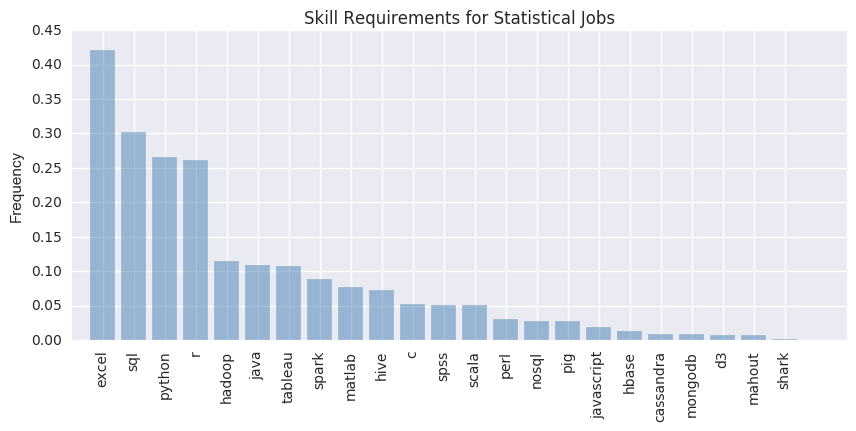

In [370]:
word_barplot(stat_skills.sort_index())

#### Bar Plot Word Frequency
Note: Only word frequency higher than 0.1 are considered here

In [369]:
def word_barplot(df):
    """
    This function takes the data frame containing word and # of post
    """
    #df = df[df['percent'] > 0.1]
    plt.figure(figsize = (10,4))
    
    words = list(df['word'])
    n = len(words)
    x_pos = np.arange(n)
    y = list(df['percent'])
    #width = .1
    
    plt.bar(x_pos, y, 
            #width, 
            align='center',color='steelblue',alpha=.5)
    plt.xlim(-1,n+1)
    plt.xticks(x_pos, words, rotation=90)
    plt.ylabel('Frequency')
    plt.title('Skill Requirements for Statistical Jobs')
    plt.legend()
    
    plt.savefig('skill set of STAT.png')
    
    plt.show()


/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


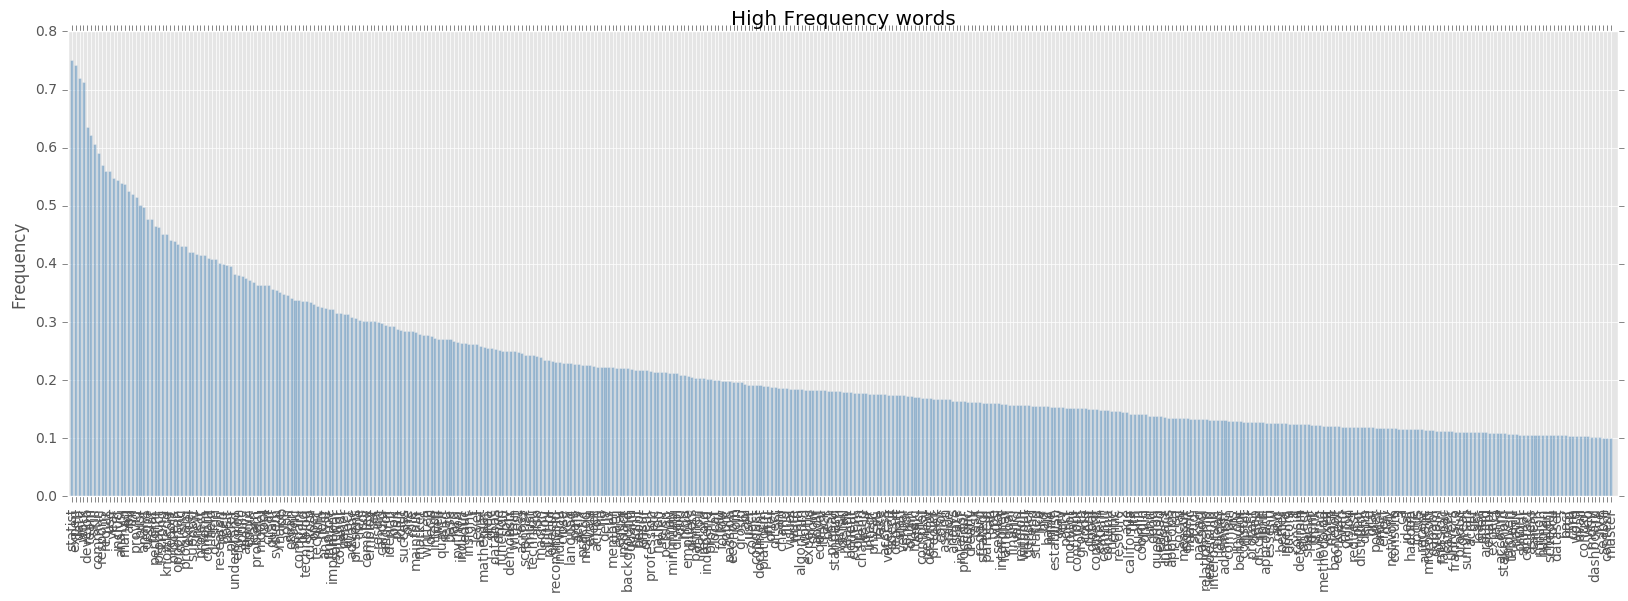

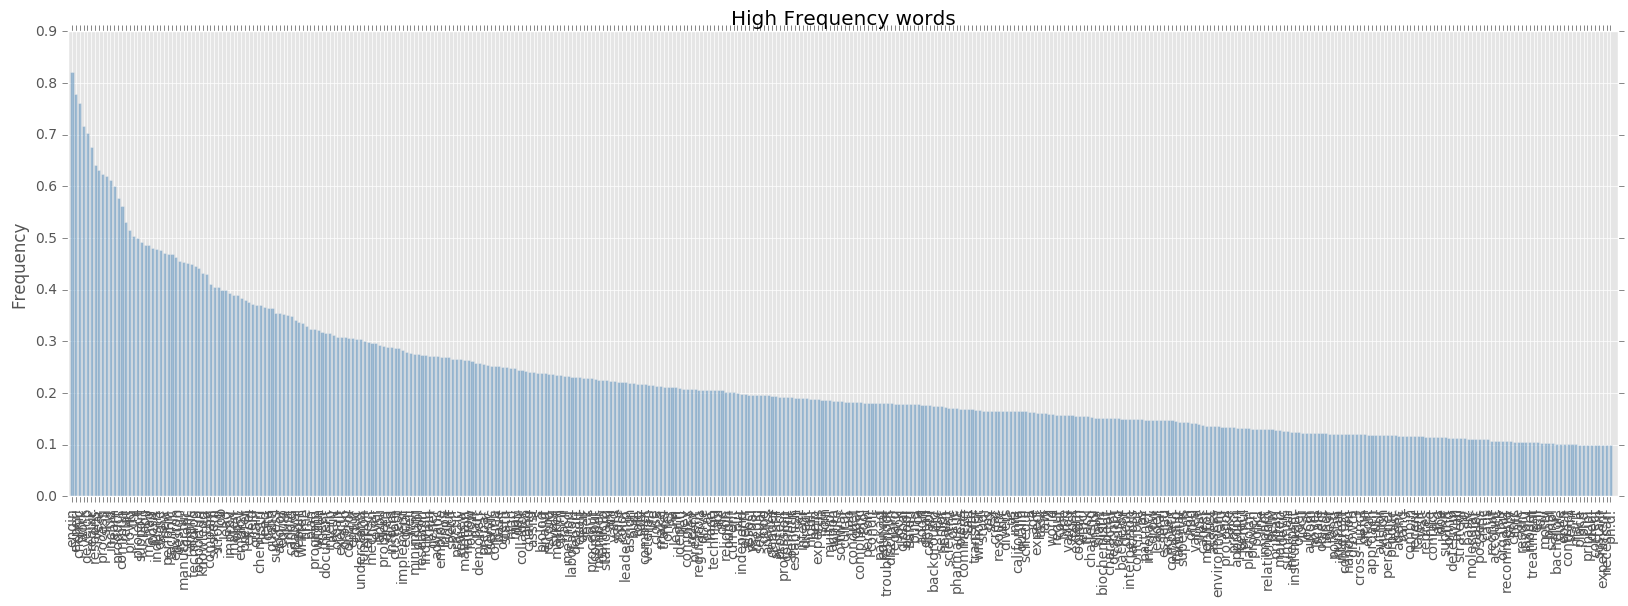

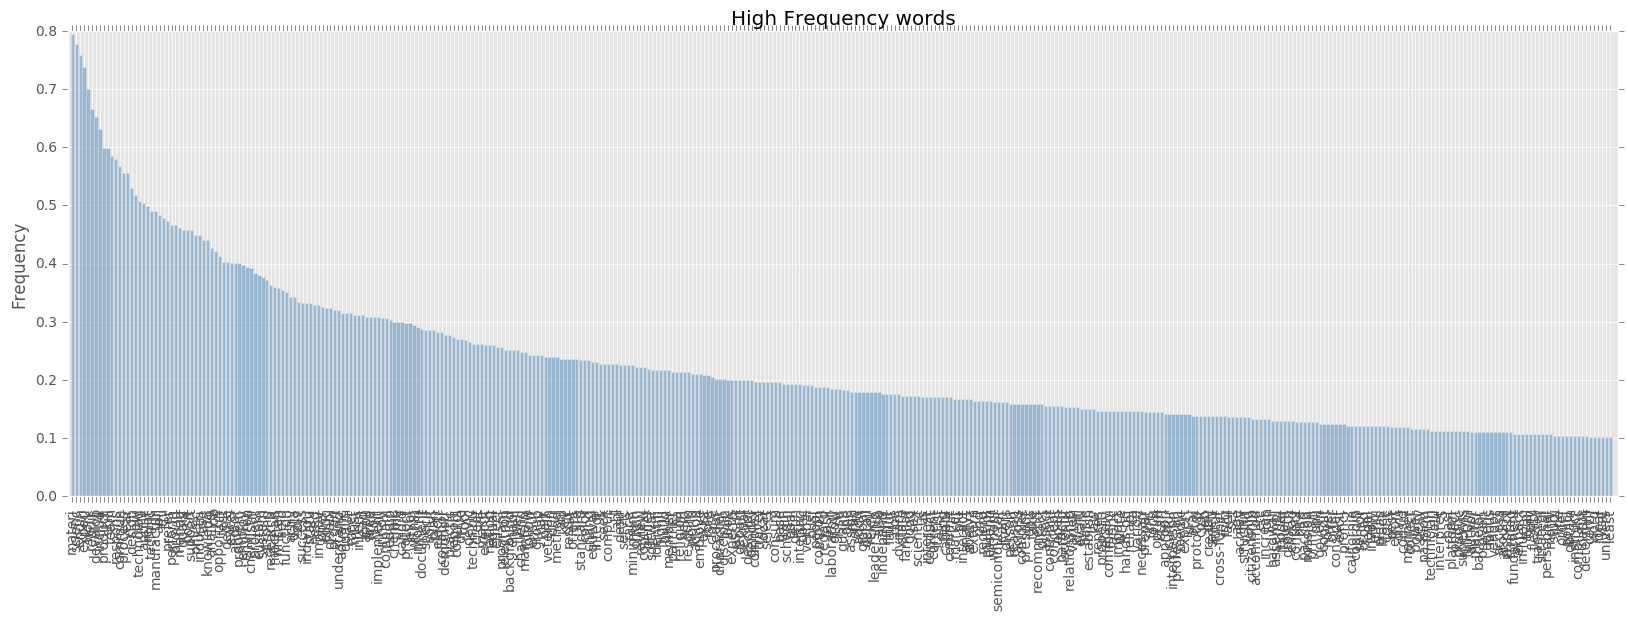

In [130]:
word_barplot(skills_stat_1[skills_stat_1['percent'] > 0.1])
word_barplot(skills_che_1[skills_che_1['percent'] > 0.1])
word_barplot(skills_mse_1[skills_mse_1['percent'] > 0.1])

In [45]:
def word_cloud(kw_list):
    '''This function generate the word cloud of the list of skill in a dataframe
    '''
    kw_list = kw_list[kw_list['percent'] > 0.1]
    text = []

    for i in range(len(kw_list)):
        text.append((kw_list['word'][i] + ' ')*kw_list['# of posts'][i])
    text = ''.join(text)
    
    plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    text_wordcloud = WordCloud().generate(text)
    plt.imshow(text_wordcloud)
    plt.axis("off")
    
    #plt.savefig('wordcloud_stat.png')
    
    plt.show()
    

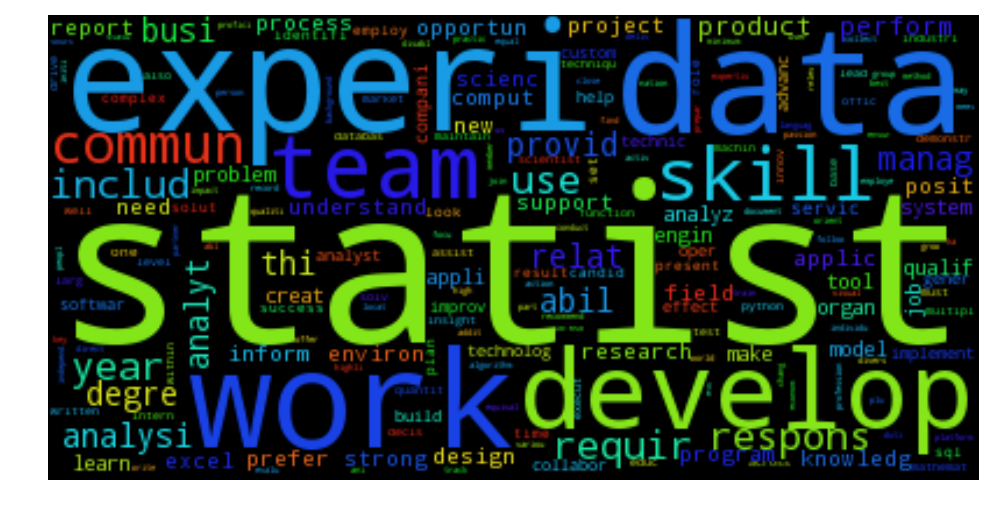

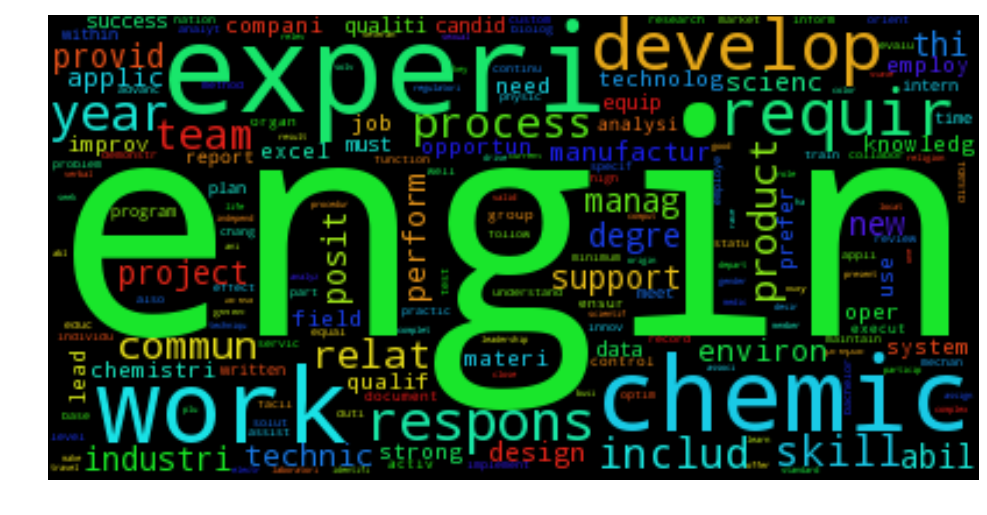

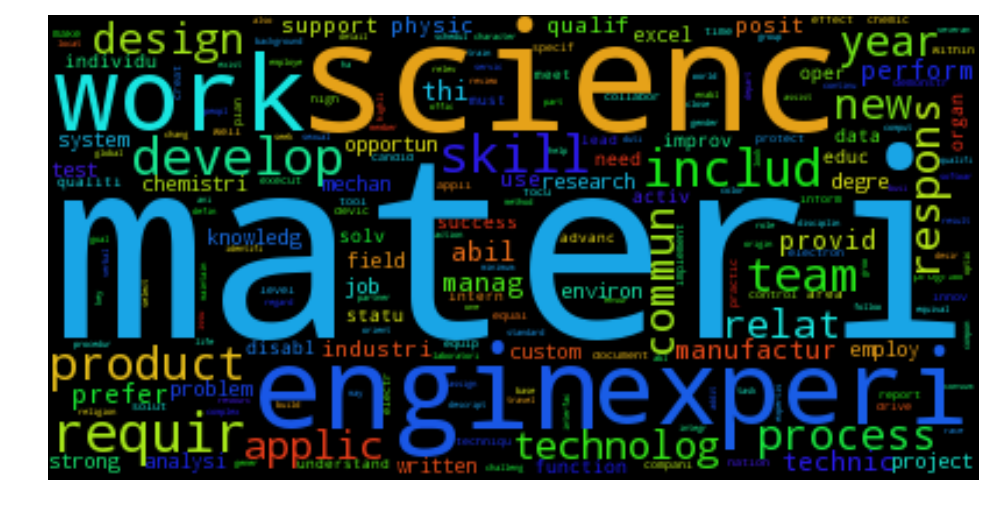

In [132]:
word_cloud(skills_stat_1)
word_cloud(skills_che_1)
word_cloud(skills_mse_1)

**skills_stat_high** is a data frame with words with frequency > 0.1

In [133]:
skills_stat_high = skills_stat_1[skills_stat_1['percent'] > 0.1]
skills_che_high = skills_che_1[skills_che_1['percent'] > 0.1]
skills_mse_high = skills_mse_1[skills_mse_1['percent'] > 0.1]

The following codes are trying to figure out the shared skills across different major

In [134]:
stat_union_che = list(set(list(skills_stat_high['word'])).union(list(skills_che_high['word'])))
stat_union_mse = list(set(list(skills_stat_high['word'])).union(list(skills_mse_high['word'])))
che_union_mse = list(set(list(skills_che_high['word'])).union(list(skills_mse_high['word'])))

In [135]:
print (len(stat_union_che))
print (len(stat_union_mse))
print (len(che_union_mse))

492
480
457


In [136]:
stat_intersect_che = list(set(list(skills_stat_high['word'])).intersection(list(skills_che_high['word'])))
stat_intersect_mse = list(set(list(skills_stat_high['word'])).intersection(list(skills_mse_high['word'])))
che_intersect_mse = list(set(list(skills_che_high['word'])).intersection(list(skills_mse_high['word'])))

In [137]:
print (len(stat_intersect_che))
print (len(stat_intersect_mse))
print (len(che_intersect_mse))

317
316
332


In [138]:
stat_intersect_che_intersect_mse = list(set(stat_intersect_che).intersection(stat_intersect_mse))

In [139]:
print (len(stat_intersect_che_intersect_mse))

298


In [140]:
print (len(list(skills_stat_high['word'])))
print (len(list(skills_che_high['word'])))
print (len(list(skills_mse_high['word'])))

408
401
388


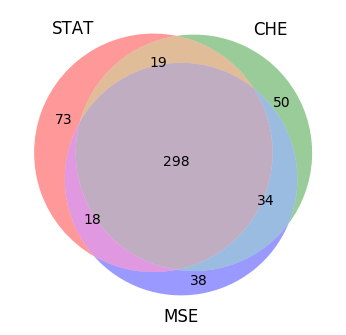

In [141]:
venn3(subsets = (73, 50, 19, 38, 18, 34, 298), set_labels = ('STAT', 'CHE', 'MSE'))

In [142]:
# stat_intersect_che_intersect_mse
#[w for w in stat_intersect_che if w not in stat_intersect_che_intersect_mse]
#[w for w in stat_intersect_mse if w not in stat_intersect_che_intersect_mse]
#[w for w in che_intersect_mse if w not in stat_intersect_che_intersect_mse]

* STAT ^ CHE
<br> 'health', 'autom', 'monitor', 'util', 'assess', 'larg', 'approach', 'vision', 'type', 'summari', 'leader'
* STAT ^ MSE
<br> 'expert', 'access', 'strateg', 'power', 'collect', 'creativ', 'passion', 'dynam', 'consum'
* CHE ^ MSE
<br> 'chemic', 'scientif', 'personnel', 'transfer', 'chemistri', 'lab', 'cross-funct', 'mechan', 'complianc', 'devic', 'travel', 'commerci', 'laboratori', 'facil', 'hands-on', 'equip', 'novel', 'character', 'electr', 'safeti', 'manufactur'

In [143]:
len(['comput','strategi','process','analyz','model','document', 'verbal','independ', 'softwar', 'physic', 'challeng', 
     'team', 'supervis', 'collabor', 'offic', 'optim', 'coordin', 'assist', 'task', 'motiv', 'excel',
     'r', 'test', 'operi', 'interact', 'protect', 'innov', 'talent', 'control', 'program', 'interperson'])

31

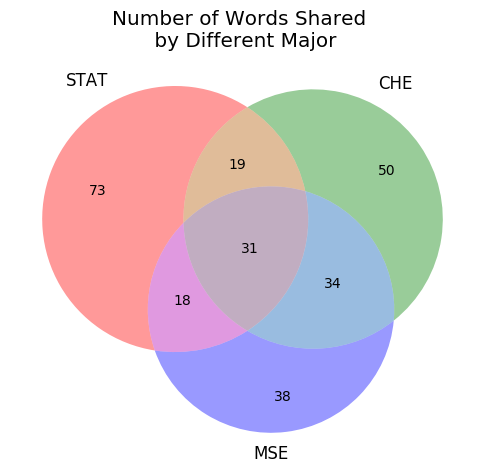

In [40]:
plt.figure(figsize = (6,6))
venn3(subsets = (73, 50, 19, 38, 18, 34, 31), set_labels = ('STAT', 'CHE', 'MSE'))
plt.title('Number of Words Shared \n by Different Major')
plt.savefig('Venn Figure of Shared Words')

### Conclusion on Skills
<ol>
    <li> The common words shared by all three majors are **comput(e), strategi, process, analyz, model, document, verbal, independ(ent), softwar(e), physic, challeng(e), team, supervis(e), collabor(ation), offic(e), optim(al), coordin(ation), assist, task, motiv(ative), excel, r, test, operi(ation), interact(ion), protect, innov(ation), talent, control, program, interperson**.
    <li> Words share by **Stat** and **CHE** are **health, autom, monitor, util, assess, larg, approach, vision, type, summari, leader**.
    <li> Words share by **Stat** and **MSE** are **expert, access, strateg, power, collect, creativ, passion, dynam, consum**
    <li> Words share by **CHE** and **MSE** are **chemic(al), scientif(ic), personnel, transfer, chemistri, lab, cross-funct, mechan(ical), complianc(e), devic(e), travel, commerci(al), laboratori, facil(itate), hands-on, equip(ment), novel(ty), character, electr(ic), safeti, manufactur(e)**.
</ol>

## By using subtitles

### Strategy for Extracting Qualifications
<ol>
    <li> compare all subtitles and find out which subtitles are "Qualifications" (__qualif, requir, experi, skill__)
    <li> split text by using subtitles
    <li> compare the word in qualifications and analyze
    
</ol>

In [145]:
# get subtitles inside job description
def get_subtitle(post):
    """
    This function takes the post of each job and get all subtitles of the post
    Input: post in html format
    Output: a list of subtitles
    """
    post = BeautifulSoup(post, "lxml")
    try:
        temp = post.find_all('b')        
        subtitles = [sub.text for sub in temp]
    except AttributeError:
        subtitles = []
    return subtitles

In [146]:
# a list containing the subtitles of each post
subtitles_stat = [get_subtitle(post) for post in list(summary_stat['description'])]
subtitles_che = [get_subtitle(post) for post in list(summary_stat['description'])]
subtitles_mse = [get_subtitle(post) for post in list(summary_stat['description'])]

In [147]:
def diction(files):
    """
    Returns a dictionary from lemmata to document ids containing that lemma
    Input is a data frame
    Output is a dictionary with lemmata as key and document ids as values
    """
    textd = {} 
    for i in range(len(files)):
        # loop over each raw text
        t = ' '.join(files[i])
        # return unique and order list of words appeared in the raw text
        s = set(lemmatize(t))- stop - set(string.punctuation)
        try:
            toks = toks | s   # append to "toks" set a "s"
        except NameError:
            toks = s    # if doesn't exsit, initialize it
        for tok in s:
            try:
                textd[tok].append(i)
            except KeyError:
                textd[tok] = [i]
    
    return textd

In [148]:
def key_sub(subtitles):
    # Lemmata of subtitles and the id of posts containing that Lemmata
    sub_id = diction(subtitles)

    # Lemmata of subtitles and the number of posts containing that Lemmata
    sub_num = {key:len(set(val)) for key,val in sub_id.items()}

    # Sort sub_num
    sorted_sub = [(key, sub_num[key]) for key in sorted(sub_num, key=lambda x : sub_num[x],
                                                                  reverse=True)]
    df_sorted_sub = pd.DataFrame(sorted_sub)
    df_sorted_sub.columns = ['word', '# of posts']
    return df_sorted_sub.iloc[:100,:]

In [149]:
# customized stop words generated from subtitles
stop_sub_stat = list(key_sub(subtitles_stat)['word'])
stop_sub_che = list(key_sub(subtitles_che)['word'])
stop_sub_mse = list(key_sub(subtitles_mse)['word'])

In [150]:
def diction_qual_2(files, stop_major):
    """
    Returns a dictionary from lemmata to document ids containing that lemma
    Input is a list of job description text
    Output is a dictionary with lemmata as key and document ids as values
    """
    textd = {} 
    for i in range(len(files)):
        # loop over each raw text
        t = files[i]
        # return unique and order list of words appeared in the raw text
        s = set(lemmatize(t))- stop - set(string.punctuation) - set(stop_major)
        try:
            toks = toks | s   # append to "toks" set a "s"
        except NameError:
            toks = s    # if doesn't exsit, initialize it
        for tok in s:
            try:
                textd[tok].append(i)
            except KeyError:
                textd[tok] = [i]
    
    return textd

In [151]:
def skills(df, stop_major):
    
    job_des = list(df['description'])
    n = len(job_des)
    job_text = [BeautifulSoup(job, "lxml").text for job in job_des]

    # Lemmata of subtitles and the id of posts containing that Lemmata
    text_id =diction_qual_2(job_text, stop_major)

    # Lemmata of subtitles and the number of posts containing that Lemmata
    text_num = {key:len(set(val)) for key,val in text_id.items()}
    # Sort text_num
    sorted_text = [(key, text_num[key]) for key in sorted(text_num, key=lambda x : text_num[x],
                                                                  reverse=True)]
    df_sorted_text = pd.DataFrame(sorted_text)
    df_sorted_text.columns = ['word', '# of posts']
    df_sorted_text['percent'] = df_sorted_text['# of posts']/n
    
    return df_sorted_text

In [152]:
skills_stat_2 = skills(summary_stat, stop_sub_stat)
skills_che_2 = skills(summary_che, stop_sub_che)
skills_mse_2 = skills(summary_mse, stop_sub_mse)

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


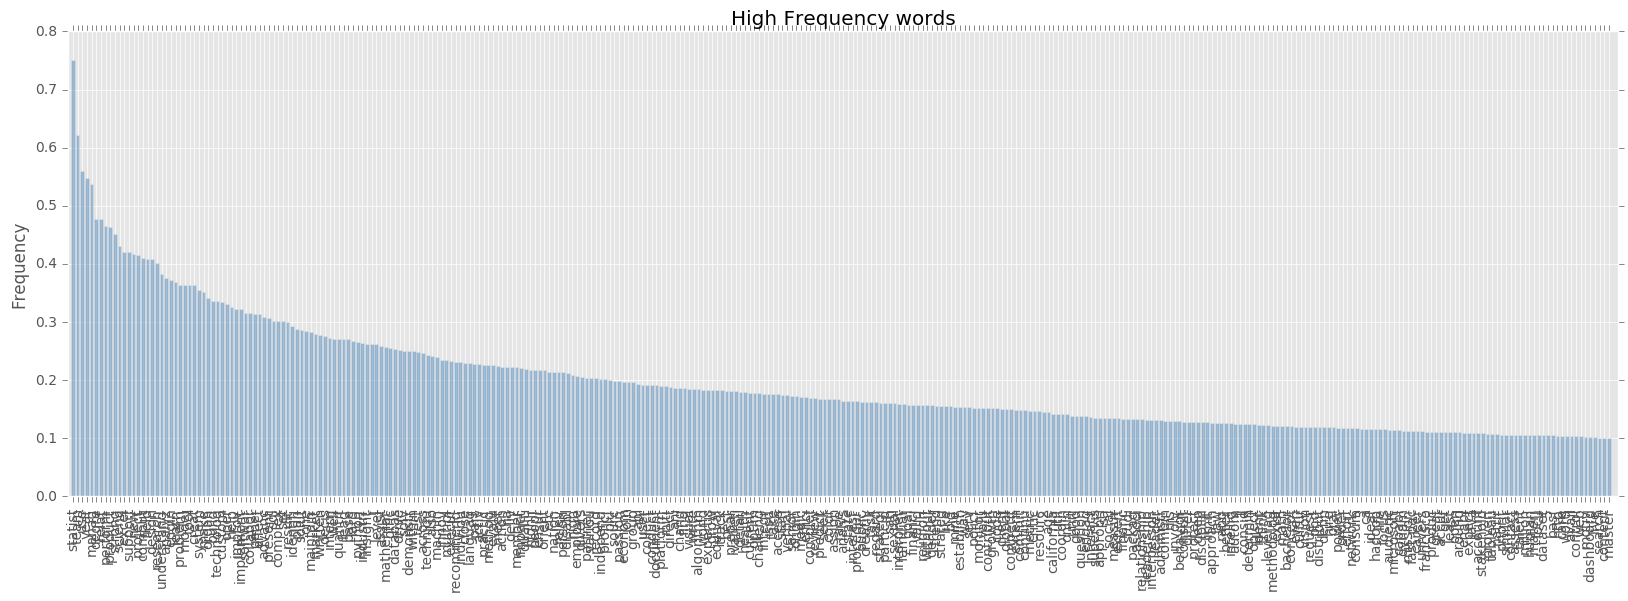

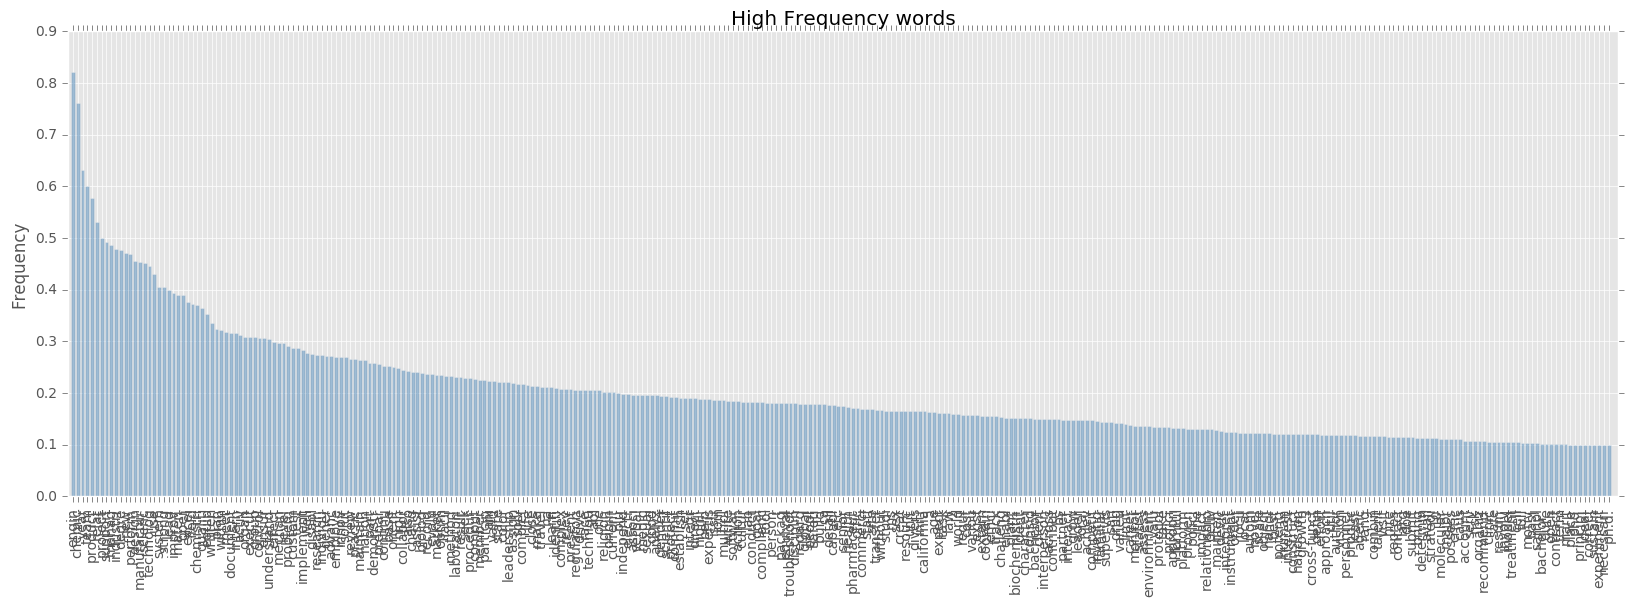

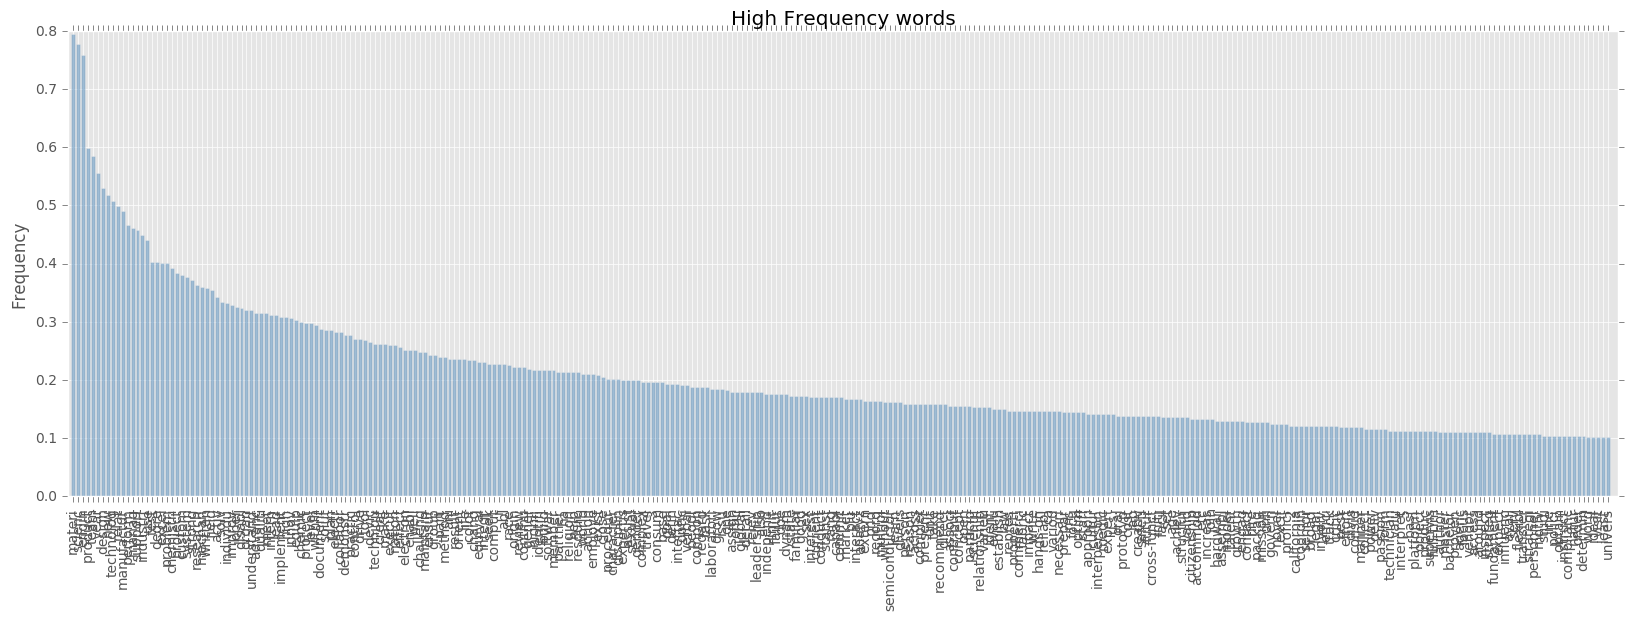

In [153]:
word_barplot(skills_stat_2)
word_barplot(skills_che_2)
word_barplot(skills_mse_2)

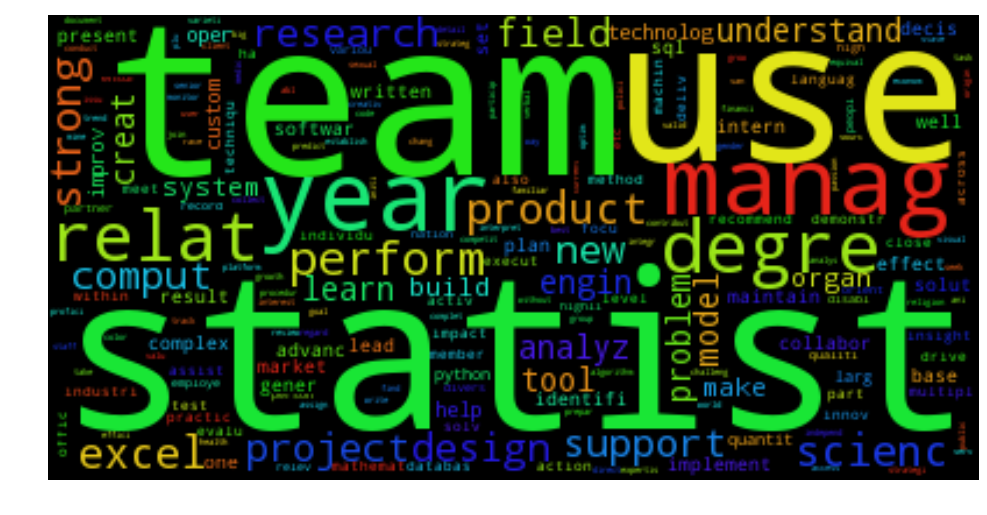

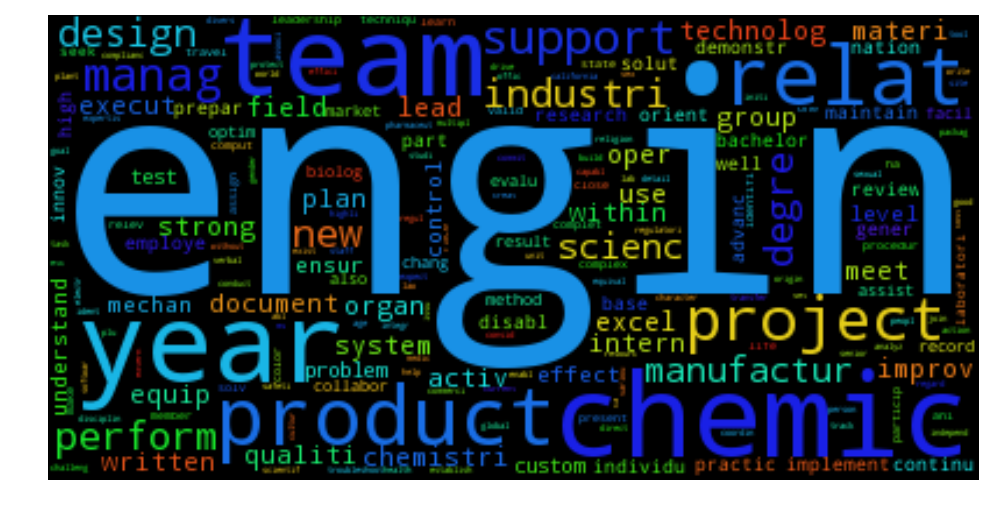

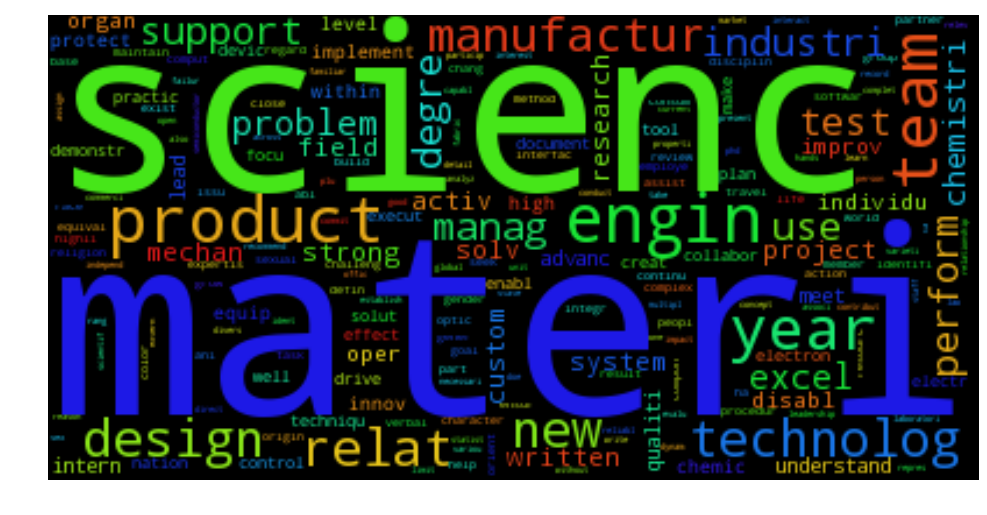

In [154]:
word_cloud(skills_stat_2)
word_cloud(skills_che_2)
word_cloud(skills_mse_2)

# PART 2 Degree Requirement

In [373]:
def degree_require(text):
    '''This function finds whether graduate degree is required in a job description
    Output: scaler of 1 --- requires graduate degree
                      0 --- no requirement for graduate degree
    '''
    kw = ['graduate', 'm.s.', "master's", "phd", "ph.d", "phd's", "ph.d's"]
    result = 'undergrad'
    for word in kw:
        if word in text:
            result = 'graduate'
            break
        break
    return result

In [374]:
def degree_list(df):
    job_des = list(df['description'])
    job_text = [BeautifulSoup(job, "lxml").text for job in job_des]
    degree_list = []
    for job in job_text:
        degree_list = degree_list + [degree_require(job)]
    
    return degree_list

In [375]:
# full-time
#summary_stat = pd.read_csv('summary_stat.csv')
#summary_che = pd.read_csv('summary_che.csv')
#summary_mse = pd.read_csv('summary_mse.csv')

degree_list_stat = degree_list(summary_stat)
degree_list_che = degree_list(summary_che)
degree_list_mse = degree_list(summary_mse)

# internship
summary_stat_intern = pd.read_csv('Jobdescription/summary_stat_intern.csv')
summary_che_intern = pd.read_csv('Jobdescription/summary_che_intern.csv')
summary_mse_intern = pd.read_csv('Jobdescription/summary_mse_intern.csv')

degree_list_stat_intern = degree_list(summary_stat_intern)
degree_list_che_intern = degree_list(summary_che_intern)
degree_list_mse_intern = degree_list(summary_mse_intern)

In [429]:
def degree_analysis(degree_stat, degree_che, degree_mse, degree_stat_intern, degree_che_intern, degree_mse_intern):
    '''This function draws a bar plot that compares the degree requirements of the majors,
    and returns a dataframe of the degree requirement summary
    '''
    df_stat = pd.DataFrame({'major': 'statistics',
                            'Degree': ['fulltime_undergrad', 'fulltime_graduate'], 
                            'Count': [degree_stat.count('undergrad'), 
                                      degree_stat.count('graduate')],
                            'Percent': [degree_stat.count('undergrad')/len(degree_stat), 
                                        degree_stat.count('graduate')/len(degree_stat)]})
    
    df_stat_intern = pd.DataFrame({'major': 'statistics',
                            'Degree': ['intern_undergrad', 'intern_graduate'], 
                            'Count': [degree_stat_intern.count('undergrad'), 
                                        degree_stat_intern.count('graduate')],
                            'Percent': [degree_stat_intern.count('undergrad')/len(degree_stat_intern), 
                                        degree_stat_intern.count('graduate')/len(degree_stat_intern)]})
    
    df_che = pd.DataFrame({'major': 'chemical engineering',
                           'Degree': ['fulltime_undergrad', 'fulltime_graduate'], 
                           'Count': [degree_che.count('undergrad'), 
                                       degree_che.count('graduate')],
                           'Percent': [degree_che.count('undergrad')/len(degree_che), 
                                       degree_che.count('graduate')/len(degree_che)]})
    
    df_che_intern = pd.DataFrame({'major': 'chemical engineering',
                           'Degree': ['intern_undergrad', 'intern_graduate'], 
                           'Count': [degree_che_intern.count('undergrad'), 
                                       degree_che_intern.count('graduate')],
                           'Percent': [degree_che_intern.count('undergrad')/len(degree_che_intern), 
                                       degree_che_intern.count('graduate')/len(degree_che_intern)]})
    
    df_mse = pd.DataFrame({'major': 'materials science',
                           'Degree': ['fulltime_undergrad', 'fulltime_graduate'], 
                           'Count': [degree_mse.count('undergrad'), 
                                       degree_mse.count('graduate')],
                           'Percent': [degree_mse.count('undergrad')/len(degree_mse), 
                                       degree_mse.count('graduate')/len(degree_mse)]})
    
    df_mse_intern = pd.DataFrame({'major': 'materials science',
                           'Degree': ['intern_undergrad', 'intern_graduate'], 
                           'Count': [degree_mse_intern.count('undergrad'),
                                       degree_mse_intern.count('graduate')],
                           'Percent': [degree_mse_intern.count('undergrad')/len(degree_mse_intern),
                                       degree_mse_intern.count('graduate')/len(degree_mse_intern)]})
    
    df_join = pd.concat([df_stat, df_stat_intern, df_che, df_che_intern, df_mse, df_mse_intern], ignore_index = True)
    
    plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
    wd = 0.05
    
    full_under_color = 'firebrick'
    full_grad_color = 'tomato'
    intern_under_color = 'steelblue'
    intern_grad_color = 'lightskyblue'
    

    stat1 = plt.bar(0.25, df_stat['Count'][0], width = wd, color = full_under_color, label = "full-time: undergrad")
    stat2 = plt.bar(0.25, df_stat['Count'][1], bottom = df_stat['Count'][0], 
                    width = wd, color = full_grad_color, label = "full-time: graduate")
    
    stat3 = plt.bar(0.31, df_stat_intern['Count'][0], width = wd, color = intern_under_color, label = "internship: undergrad")
    stat4 = plt.bar(0.31, df_stat_intern['Count'][1], bottom = df_stat_intern['Count'][0], 
                    width = wd, color = intern_grad_color, label = "internship: graduate")
    
    plt.legend()
    
    che1 = plt.bar(0.5, df_che['Count'][0], width = wd, color = full_under_color, label = "undergrad")
    che2 = plt.bar(0.5, df_che['Count'][1], bottom = df_che['Count'][0], 
                    width = wd, color = full_grad_color, label = "graduate")
    che3 = plt.bar(0.56, df_che_intern['Count'][0], width = wd, color = intern_under_color, label = "undergrad")
    che4 = plt.bar(0.56, df_che_intern['Count'][1], bottom = df_che_intern['Count'][0], 
                    width = wd, color = intern_grad_color, label = "graduate")
    
    mse1 = plt.bar(0.75, df_mse['Count'][0], width = wd, color = full_under_color, label = "undergrad")
    mse2 = plt.bar(0.75, df_mse['Count'][1], bottom = df_mse['Count'][0], 
                    width = wd, color = full_grad_color, label = "graduate")
    mse3 = plt.bar(0.81, df_mse_intern['Count'][0], width = wd, color = intern_under_color, label = "undergrad")
    mse4 = plt.bar(0.81, df_mse_intern['Count'][1], bottom = df_mse_intern['Count'][0], 
                    width = wd, color = intern_grad_color, label = "graduate")
    
    plt.xticks([0.28, 0.53, 0.78], ["statistics", "chemical engineering", "materials science"])
    plt.title('Degree requirement')

    plt.ylabel('Number of job posts')
    plt.savefig('Degree requirement comparison')
    plt.show()
    
    return df_join

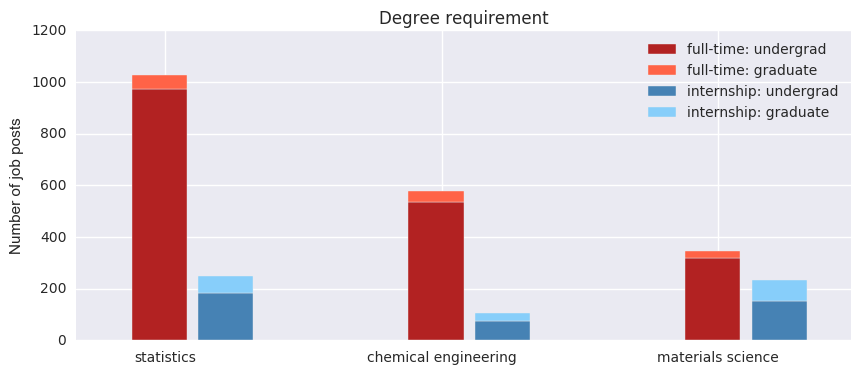

Count              Degree   Percent                 major
0     971  fulltime_undergrad  0.947317            statistics
1      54   fulltime_graduate  0.052683            statistics
2     183    intern_undergrad  0.734940            statistics
3      66     intern_graduate  0.265060            statistics
4     537  fulltime_undergrad  0.927461  chemical engineering
5      42   fulltime_graduate  0.072539  chemical engineering
6      73    intern_undergrad  0.701923  chemical engineering
7      31     intern_graduate  0.298077  chemical engineering
8     320  fulltime_undergrad  0.922190     materials science
9      27   fulltime_graduate  0.077810     materials science
10    151    intern_undergrad  0.650862     materials science
11     81     intern_graduate  0.349138     materials science

In [430]:
degree_analysis(degree_list_stat, degree_list_che, degree_list_mse, 
                degree_list_stat_intern, degree_list_che_intern, degree_list_mse_intern)

## PART 3 Salary

In [56]:
def find_salary(text):
    '''This function finds salary in a job description
    Output: value of the salary
    '''
    import re
    regex = re.compile(r'^\$([1-9]{1}[\d]{0,2}(\,[\d]{3})*(\.[\d]{0,2})?|[1-9]{1}[\d]{0,}(\.[\d]{0,2})?|0(\.[\d]{0,2})?|(\.[\d]{1,2})?)$')
    
    words = re.split(' ',text)
    words = [w for w in words if regex.search(w)]

    try: 
        result = words[0]
    except IndexError:
        result = 'Not Found'
   
    return result

In [57]:
def salary_list(df):
    job_des = list(df['description'])
    job_text = [BeautifulSoup(job, "lxml").text for job in job_des]
    salary_list = []
    for job in job_text:
        salary_list = salary_list + [find_salary(job)]
    
    return salary_list

In [62]:
salary_list_stat = salary_list(summary_stat)
salary_list_che = salary_list(summary_che)
salary_list_mse = salary_list(summary_mse)

In [79]:
job_ca_stat = pd.read_csv('Joblist/job_ca_statistics.csv')
url_stat = list(job_ca_stat['url'])
job_ca_che = pd.read_csv('Joblist/job_ca_chemical engineering.csv')
url_che = list(job_ca_che['url'])
job_ca_mse = pd.read_csv('Joblist/job_ca_materials science.csv')
url_mse = list(job_ca_mse['url'])

In [185]:
import requests
import requests_cache
requests_cache.install_cache("cache")
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
def salary_text(url):
    """
    This function extracts information of one post by taking a url as input
    Output is a dictionary with job title, company name, and description of the job.
    """
    post_doc = requests.get(url).content
    post = BeautifulSoup(post_doc, 'html.parser')
    temp = post.find_all('span')
    result = [t.text for t in temp]
    result = ' '.join(result)
    return result

In [70]:
#salary_text_stat = [salary_text(url) for url in url_stat]
salary_text_stat = list(pd.read_csv('salary_stat.csv')['0'])
salary_list_stat_2 = [find_salary(t) for t in salary_text_stat]
#salary_text_che = [salary_text(url) for url in url_che]
salary_text_che = list(pd.read_csv('salary_che.csv')['0'])
salary_list_che_2 = [find_salary(t) for t in salary_text_che]
#salary_text_mse = [salary_text(url) for url in url_mse]
salary_text_mse = list(pd.read_csv('salary_mse.csv')['0'])
salary_list_mse_2 = [find_salary(t) for t in salary_text_mse]

In [335]:
pd.DataFrame(salary_text_stat).to_csv('salary_stat.csv')
pd.DataFrame(salary_text_che).to_csv('salary_che.csv')
pd.DataFrame(salary_text_mse).to_csv('salary_mse.csv')

In [71]:
def combine_salary(lst1, lst2):
    result = lst2
    for i in range(len(lst1)):
        if lst2[i] == 'Not Found':
            result[i] = lst1[i]
    return result

In [304]:
salary_stat = combine_salary(salary_list_stat, salary_list_stat_2)
salary_che = combine_salary(salary_list_che, salary_list_che_2)
salary_mse = combine_salary(salary_list_mse, salary_list_mse_2)

In [305]:
def clean_salary(lst):
    """
    This function takes a list containing the salary strings we parsed from the webpage
    Input example: salary_stat
    Input: a list with salary stored as string, like '$12,000'
    Output: a list of numbers with salary information
    """
    lst_rm_notfound = [re.sub(',','',s[1:]) for s in list(Counter(lst).keys()) if s != 'Not Found']
    lst_num = [float(s) for s in lst_rm_notfound if s != '']
    for i in range(len(lst_num)):
        if lst_num[i] < 1000:
            lst_num[i] = 'nan'
        elif lst_num[i] > 1000 and lst_num[i] <20000:
            lst_num[i] = lst_num[i] * 12.
    return lst_num        

In [306]:
salary_stat_num = clean_salary(salary_stat)
salary_che_num = clean_salary(salary_che)
salary_mse_num = clean_salary(salary_mse)

In [307]:
import statistics
def sal_data(lst):    
    return [np.nanmin(lst),
            np.nanmedian(lst),
            np.nanmax(lst)]

In [351]:
# sal_data(salary_stat_num)
# sal_data(salary_che_num)
# sal_data(salary_mse_num)

## Draw Boxplot

In [443]:


def salary_plots(stat_sal_list, che_sal_list, mse_sal_list):
    '''This function takes 3 list of salaries and draws a comparison box plot
    Default input: 'salary_stat_num', 'salary_che_num', 'salary_mse_num'
    '''
    plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
    stat = [x for x in salary_stat_num if x is not 'nan']
    che = [x for x in salary_che_num if x is not 'nan']
    mse = [x for x in salary_mse_num if x is not 'nan']

    violin_parts = plt.violinplot([stat, che, mse], showmeans=True)    
    for pc in violin_parts['bodies']:
        pc.set_facecolor('tomato')
    
    
    plt.xlabel(' '*5 + 'statistics' + ' '*40 + 'chemical engineering' + ' '*30 + 'materials science')
    plt.ylabel('Salary distribution')
    plt.xticks([])
    plt.title('Violin plot of salary distributions of different majors')
    plt.savefig('salary_violinplot.png')
    plt.show()

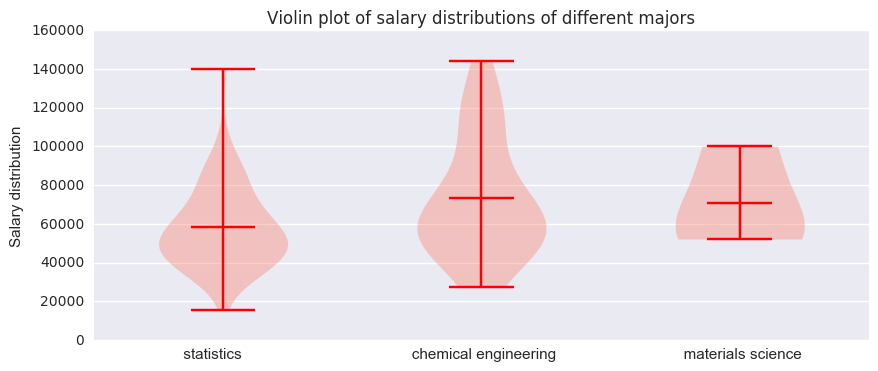

In [444]:
salary_plots(salary_stat_num, salary_che_num, salary_mse_num)